In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
#1. Importar un csv: Importe el set de datos creados por usted al final de la
#sesión pasada.

In [3]:
df = pd.read_csv('subsample_SLR_demo.csv')

In [4]:
df.head()

undp_hdi ccodealp      ht_region    gle_cgdpc    imf_pop  ffp_hf   wef_qes  \
0     0.421      GNB    SubSaharian    961.26001        NaN     8.5       NaN   
1     0.882      ESP     WesternDem  31086.35000  46.455002     2.4  3.441691   
2     0.514      SLB        Pacific   2113.06010   0.562000     6.3       NaN   
3     0.671      BOL          LatAm   4023.87010  10.078000     6.4  3.348756   
4     0.678      VNM  SouthEastAsia   4147.56980  89.691002     5.6  3.336011   

   wdi_expedu   wdi_ners  
0     2.17313        NaN  
1     4.27093  96.458618  
2         NaN        NaN  
3     7.28546  76.535461  
4     5.65873        NaN

In [5]:
#2.Importar su conjunto de funciones. Para ello deberás:

In [6]:
#Generar un archivo ancilliary_funcs.py para guardar las funciones creadas
#en la sesión pasada e importe

In [6]:
from ancilliary_funcs import*

In [7]:
for i in df:
    print(f"Observaciones perdidas para la columna '{i}': {obs_perdidas(df, str(i), semilla=7912)}")

Observaciones perdidas para la columna 'undp_hdi': {'casos perdidos': 6, 'porcentaje': 0.062}
Observaciones perdidas para la columna 'ccodealp': {'casos perdidos': 0, 'porcentaje': 0}
Observaciones perdidas para la columna 'ht_region': {'casos perdidos': 0, 'porcentaje': 0}
Observaciones perdidas para la columna 'gle_cgdpc': {'casos perdidos': 1, 'porcentaje': 0.01}
Observaciones perdidas para la columna 'imf_pop': {'casos perdidos': 28, 'porcentaje': 0.289}
Observaciones perdidas para la columna 'ffp_hf': {'casos perdidos': 10, 'porcentaje': 0.103}
Observaciones perdidas para la columna 'wef_qes': {'casos perdidos': 21, 'porcentaje': 0.216}
Observaciones perdidas para la columna 'wdi_expedu': {'casos perdidos': 28, 'porcentaje': 0.289}
Observaciones perdidas para la columna 'wdi_ners': {'casos perdidos': 31, 'porcentaje': 0.32}


3. Estimar el puntaje Z de una variable: Se debe utilizar la que posea la
menor cantidad de datos perdidos (o que no posea). "variables ccodealp y  ht_region no tienen na, pero son cualitativas, la variable gle_cgdpc es la que menos na tiene y es cuantitativa (El PIB per cápita)"

𝑧𝑖 = ( 𝑥𝑖 − 𝑥 ) / σ (𝑥)


In [8]:
#borrar na de variable gle_cgdcp

In [10]:
df_sna=df.dropna(subset=['gle_cgdpc'])

In [11]:
#df['gle_cgdpc'].mean()

In [12]:
#df['gle_cgdpc'].std()

In [11]:
df_sna['puntaje_z']=(df_sna['gle_cgdpc']-df_sna['gle_cgdpc'].mean())/df_sna['gle_cgdpc'].std()

C:\Users\Susana\AppData\Local\Temp/ipykernel_13716/3103546730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sna['puntaje_z']=(df_sna['gle_cgdpc']-df_sna['gle_cgdpc'].mean())/df_sna['gle_cgdpc'].std()


In [12]:
df_sna.head()

undp_hdi ccodealp      ht_region    gle_cgdpc    imf_pop  ffp_hf   wef_qes  \
0     0.421      GNB    SubSaharian    961.26001        NaN     8.5       NaN   
1     0.882      ESP     WesternDem  31086.35000  46.455002     2.4  3.441691   
2     0.514      SLB        Pacific   2113.06010   0.562000     6.3       NaN   
3     0.671      BOL          LatAm   4023.87010  10.078000     6.4  3.348756   
4     0.678      VNM  SouthEastAsia   4147.56980  89.691002     5.6  3.336011   

   wdi_expedu   wdi_ners  puntaje_z  
0     2.17313        NaN  -0.646234  
1     4.27093  96.458618   0.743397  
2         NaN        NaN  -0.593103  
3     7.28546  76.535461  -0.504960  
4     5.65873        NaN  -0.499254

In [13]:
df_sna.sort_values(by=['puntaje_z'], inplace=True)

C:\Users\Susana\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
df_sna.head(10)

undp_hdi ccodealp    ht_region   gle_cgdpc  imf_pop  ffp_hf   wef_qes  \
20     0.425      COD  SubSaharian   324.16000      NaN     7.1  2.957447   
8      0.427      LBR  SubSaharian   488.26999      NaN     6.6  3.472222   
16     0.441      ETH  SubSaharian   900.77002   88.347     7.0  3.599252   
61     0.473      MWI  SubSaharian   938.34998   17.604     8.1  3.185532   
0      0.421      GNB  SubSaharian   961.26001      NaN     8.5       NaN   
53     0.498      COM  SubSaharian   972.35999    0.776     7.8       NaN   
55     0.414      GIN  SubSaharian   993.83002   11.745     7.2  2.425785   
7      0.418      ERI  SubSaharian  1007.28000      NaN     7.6       NaN   
49     0.490      HTI        LatAm  1024.93990      NaN     9.3  2.325877   
5      0.484      TGO  SubSaharian  1036.28000    6.929     7.3       NaN   

    wdi_expedu   wdi_ners  puntaje_z  
20     2.24535        NaN  -0.675623  
8      2.75756        NaN  -0.668053  
16     4.50051  30.274250  -0.649025  
61     4.84254  32.942291  -0.647291  
0      2.17313        NaN  -0.646234  
53     4.86862  43.934471  -0.645722  
55     3.20817  31.788179  -0.644732  
7          NaN  28.415560  -0.644111  
49         NaN        NaN  -0.643297  
5      4.86846        NaN  -0.642774

In [15]:
df_sna.tail(10)

undp_hdi ccodealp      ht_region   gle_cgdpc  imf_pop  ffp_hf   wef_qes  \
35     0.892      AUT     WesternDem   38868.039    8.544     1.5  4.492075   
29     0.923      NLD     WesternDem   42258.352   16.865     2.6  5.304531   
93       NaN      SMR     WesternDem   42664.211    0.034     NaN       NaN   
40     0.864      BRN  SouthEastAsia   46103.840    0.412     4.6  4.417221   
77     0.948      NOR     WesternDem   57634.770    5.156     1.6  5.048264   
94     0.896      LUX     WesternDem   61404.480    0.550     2.1  4.580255   
76     0.799      KWT    NorthAfrica   64342.711    3.999     3.1  3.075769   
22     0.911      LIE     WesternDem  102243.520      NaN     NaN       NaN   
91     0.855      QAT    NorthAfrica  104049.440    2.045     3.1  5.820522   
90       NaN      MCO     WesternDem  108481.130      NaN     NaN       NaN   

    wdi_expedu   wdi_ners  puntaje_z  
35     5.49955        NaN   1.102356  
29     5.52938  93.882019   1.258747  
93     2.38373        NaN   1.277469  
40     3.35319  87.032318   1.436135  
77     7.37329  95.201927   1.968042  
94     4.08388  84.603470   2.141933  
76         NaN  83.578850   2.277470  
22     2.55604  91.538719   4.025786  
91     3.60719  72.464622   4.109090  
90     1.02195        NaN   4.313519

In [18]:
#al ordenar puntaje_z de observarán extremos de puntaje z en los 10 primeros y 10 últimos. Puntaje z permite comparar
#la importancia de las desviaciones estandar con respecto a la media, es decir que tan desviado está la observación con 
#respecto a las demás observaciones de la variable

4. Estimar el puntaje z de las regiones. Utilizando el resultado anterior,
visualice su nueva variable estandarizada (es decir, luego de calcular el puntaje Z).

In [16]:
#base original para linea de la media de la variable antes de agrupar
df2 = pd.read_csv("qog_std_cs_jan18.csv")

In [17]:
#se crea puntaje z de base original
df2['puntaje_z']=(df2['gle_cgdpc']-df2['gle_cgdpc'].mean())/df2['gle_cgdpc'].std()

In [18]:
#también se categoriza regiones
a= df2['ht_region'].unique()
a.sort()
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [19]:
regiones_numero = df2['ht_region'].unique()
regiones_numero.sort()
regiones_nombre = ['EastEurope', 'LatAm', 'NorthAfrica',
                   'SubSaharian', 'WesternDem', 'EastAsia',
                   'SouthEastAsia','SouthAsia','Pacific', 'Caribbean']
regiones = dict(zip(regiones_numero, regiones_nombre))
#f_dzc['region_renombrada'] = df_dzc['ht_region'].replace(regiones)
df2['ht_region'] = df2['ht_region'].replace(regiones)

In [17]:
regiones

{1: 'EastEurope',
 2: 'LatAm',
 3: 'NorthAfrica',
 4: 'SubSaharian',
 5: 'WesternDem',
 6: 'EastAsia',
 7: 'SouthEastAsia',
 8: 'SouthAsia',
 9: 'Pacific',
 10: 'Caribbean'}

In [20]:
df2.ht_region.unique()

array(['SouthAsia', 'EastEurope', 'NorthAfrica', 'WesternDem',
       'SubSaharian', 'Caribbean', 'LatAm', 'Pacific', 'SouthEastAsia',
       'EastAsia'], dtype=object)

In [21]:
df2['ht_region'].head()

0      SouthAsia
1     EastEurope
2    NorthAfrica
3     WesternDem
4    SubSaharian
Name: ht_region, dtype: object

In [ ]:
#dotplot

In [22]:
#se crea esta variable para generar la media de los datos completos (antes de agrupar), por ellos se usa df2
df_dropna2 =df2.dropna(subset=['puntaje_z'])

In [23]:
#se crea para tener las medias de cada región del puntaje z
group_mean = df_sna.groupby('ht_region')['puntaje_z'].mean()

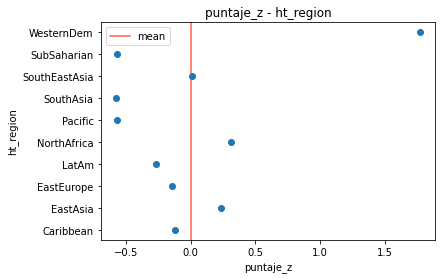

In [24]:
plt.title(f"{'puntaje_z'} - {'ht_region'}")
plt.ylabel('ht_region')
plt.xlabel('puntaje_z')

#esta es la linea que mostrará la media de los datos totales
plt.axvline(df_dropna2['puntaje_z'].mean(), color='tomato', label='mean')
plt.legend()  
#se generá el gráfico
plt.plot(group_mean.values, group_mean.index,'o' )

5. Generar curvas de Densidad de Probabilidad<br>
Cree una función que permita visualizar las curvas de Densidad de Probabilidad<br>
para las variables imf_pop, gle_cgdpc y wdi_exph.<br>
● La función debe contener como argumentos:<br>
○ df: Tabla de datos 1.<br>
○ variable: Variable a contrastar.<br>

In [159]:
# primero se sacan los na para cada variable

In [25]:
df_imf_pop =df_sna.dropna(subset=['imf_pop'])

In [26]:
df_gle_cgdpc =df_sna.dropna(subset=['gle_cgdpc'])

In [27]:
# se cambia vdi_exph por wdi_expedu ya que el primero no está en la submuestra
df_wdi_expedu =df_sna.dropna(subset=['wdi_expedu'])

In [28]:
def densidad(df,variable):
    df[variable].plot.density(color='green') 
    plt.title('Función de Densidad de Probabilidad') 
    plt.show()


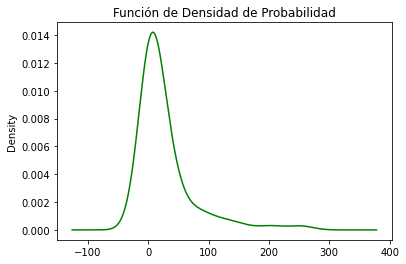

In [29]:
densidad(df_imf_pop,'imf_pop')

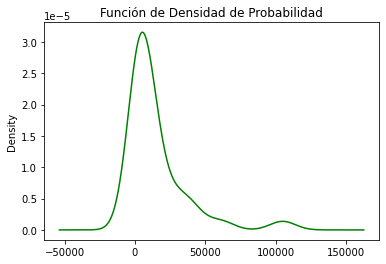

In [30]:
densidad(df_gle_cgdpc,'gle_cgdpc')

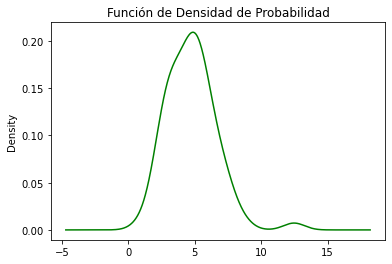

In [31]:
densidad(df_wdi_expedu,'wdi_expedu')